# Gold Price Prediction

#### In this report is to predict  the price of the variable with the column name GLD. 
our objective is to predict the values of the variable GLD with holding the explanatory or predictor variables as SPX,GLD,USO,SLV,USR/USD.

## Agenda:-
### 1. Import Libraries.
### 2.Read Dataset.
### 3.Explore the Dataset.
### 4.See Correlation between Variable.
### 5.Split Dataset.
### 6.Model with Random Forest Regressor.

### 1.Import Libraries

In [1]:
# import libraries that I need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### 2.Read Dataset and see dataset

In [2]:
gold_data=pd.read_csv('./gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### 3.Explore the Dataset

In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### 4.See Correlation between Variable

In [9]:
correlation=gold_data.corr()

<AxesSubplot:>

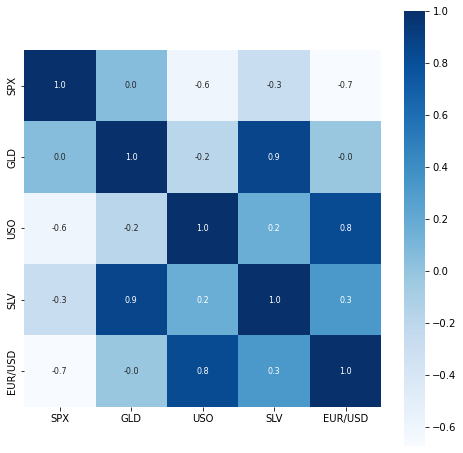

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

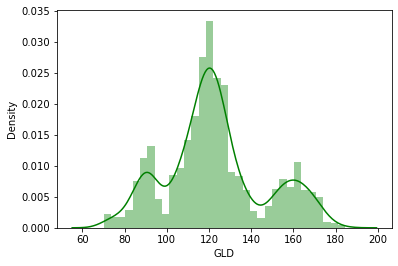

In [12]:
sns.distplot(gold_data['GLD'],color='green')

### 5.Split Dataset

In [13]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

### 6.Model with Random Forest Regressor

In [17]:
regressor= RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.28049889  81.74209997 115.99290034 127.53470064 120.51250133
 154.66439752 150.4806982  126.20839997 117.58579871 126.00190078
 116.59700103 171.78850114 141.84109819 167.40039838 115.16159999
 117.6511004  139.86940338 170.18570106 159.76200223 156.84150011
 155.12899986 125.49230014 176.10069989 157.32110339 125.20930039
  93.74699975  76.62500036 120.76009997 119.09069915 167.55349943
  88.14250038 125.32990016  91.17410072 117.69650031 121.07999942
 136.74930045 115.52500127 115.08450071 147.78860017 107.23510113
 104.51070247  87.17429799 126.54290043 118.07090001 154.26129838
 119.5822999  108.47009942 107.96389795  93.21160049 127.08129776
  75.15310023 113.64499938 121.22070044 111.33409905 118.75919885
 120.72209953 158.91070089 167.08440107 147.16359678  85.93759884
  94.18340034  86.77279907  90.59680051 119.11330072 126.44570063
 127.67500032 169.53140072 122.28399937 117.36699892  98.47800039
 168.37870003 143.23329928 132.31740285 121.09650214 120.78249948
 119.80960

In [21]:
r_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Value :',r_score)

R Squared Value : 0.9890896596701851


In [22]:
Y_test=list(Y_test)

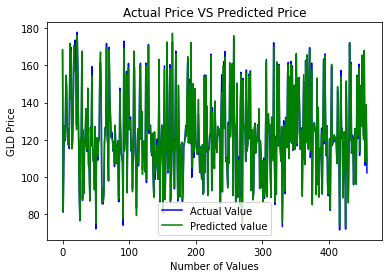

In [23]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()